Assignment 1 - BMI 505

Question 1

In [188]:
# The independent and dependent variables for the following statements are
    # 1 a. A study is done to determine if elderly drivers are involved in more motor vehicle fatalities than other drivers.
    # The number of fatalities per 100,000 drivers is compared to the age of drivers.
        # Independent variable: Age, Dependent variable: Number of motor vehicle fatalities per 100,000 drivers
    # 1.b A study is done to determine if the weekly grocery bill changes based on the number of family members.
        # Independent variable: Number of family members, Dependent variable: Weekly grocery bill
    # 1.c Insurance companies base life insurance premiums partially on the age of the applicant.
        # Independent variable: Age, Dependent variable: Life insurance premium
    # 1.d Utility bills vary according to power consumption.
        # Independent variable: Power consumption, Dependent variable: Utility bill
    # 1.e A study is done to determine if a higher education reduces the crime rate in a population.
        # Independent variable: Education level, Dependent variable: Crime rate

In [189]:
import os
import pandas as pd
import numpy as np
import openpyxl
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RANSACRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

Question 2

In [190]:
os.getcwd()

'/content'

In [191]:
os.listdir(os.getcwd())

['.config',
 'A1.xlsx',
 'pca.csv',
 'Wholesale customers data.csv',
 'sample_data']

In [192]:
df = pd.read_excel("A1.xlsx", sheet_name='Sheet1')
df2 = pd.read_excel("A1.xlsx", sheet_name='Sheet2')
df3 = pd.read_excel("A1.xlsx", sheet_name='Sheet3')
df4 = pd.read_csv("Wholesale customers data.csv")
df5 = pd.read_csv("pca.csv")
df6 = pd.read_csv("pca.csv")

Does the higher cost of tuition translate into higher-paying jobs?
The table lists the top ten colleges based on mid-career salary and the associated yearly tuition costs.

In [193]:
df

,School,Mid-Career Salary,Yearly Tuition
0,Princeton,137,28540
1,Harvey Mudd,135,40133
2,Caltech,127,39900
3,US Naval Academy,122,0
4,West Point,120,0
5,MIT,118,42050
6,Lehigh University,118,43220
7,NYU-Poly,117,39565
8,Babson College,117,40400
9,Stanford,114,54506


In [194]:
correlation = df['Yearly Tuition'].corr(df['Mid-Career Salary'])
print("Correlation:", correlation)

Correlation: -0.14607228867600155


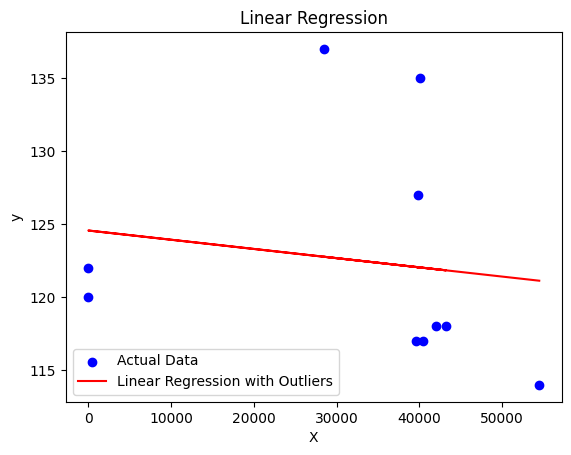

In [195]:
X = df['Yearly Tuition'].values.reshape(-1, 1)
y = df['Mid-Career Salary'].values

regr = linear_model.LinearRegression()

# Predictions
regr.fit(X,y)
y_pred = regr.predict(X)

# Plotting
plt.scatter(X, y, color='blue', label='Actual Data')  # Scatter plot of actual data
plt.plot(X, y_pred, color='red', label='Linear Regression with Outliers')  # Regression line

# Add labels and title
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()

# Show plot
plt.show()

In [196]:
df2

,School,Mid-Career Salary,Yearly Tuition
0,Princeton,137,28540
1,Harvey Mudd,135,40133
2,Caltech,127,39900
3,MIT,118,42050
4,Lehigh University,118,43220
5,NYU-Poly,117,39565
6,Babson College,117,40400
7,Stanford,114,54506


In [197]:
correlation = df2['Yearly Tuition'].corr(df2['Mid-Career Salary'])
print("Correlation:", correlation)

Correlation: -0.7139776012651265


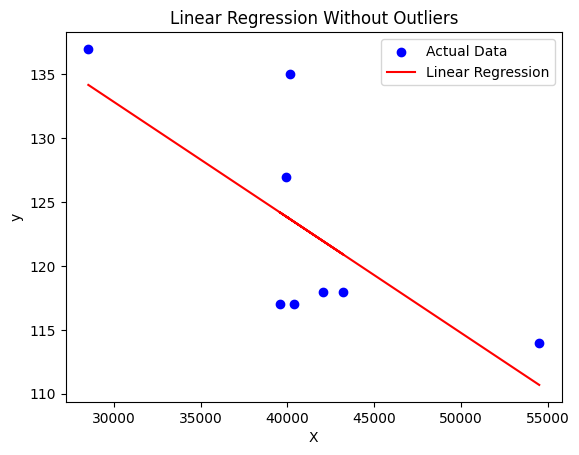

In [198]:
X2 = df2['Yearly Tuition'].values.reshape(-1, 1)
y2 = df2['Mid-Career Salary'].values

regr = linear_model.LinearRegression()

# Predictions
regr.fit(X2,y2)
y_pred2 = regr.predict(X2)

# Plotting
plt.scatter(X2, y2, color='blue', label='Actual Data')  # Scatter plot of actual data
plt.plot(X2, y_pred2, color='red', label='Linear Regression')  # Regression line

# Add labels and title
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Without Outliers')
plt.legend()

# Show plot
plt.show()

Does the higher cost of tuition translate into higher-paying jobs?
There is not a strong enough correlation to suggest that the higher cost of tuitions translates into higher-paying jobs.
If anything there is a negative correlation, suggesting that a higher cost of tuition translates to lower-paying jobs.

Question 3

Table shows the life expectancy for an individual born in the United States in certain years.

In [199]:
df3

,Year,Birth Life Expectancy
0,1930,59.7
1,1940,62.9
2,1950,70.2
3,1965,69.7
4,1973,71.4
5,1982,74.5
6,1987,75.0
7,1992,75.7
8,2010,78.7


3.a Decide which variable should be the independent variable and which should be the dependent variable.
The independent variable is the year and the dependent is the life expectancy year.

3.b Draw a scatterplot

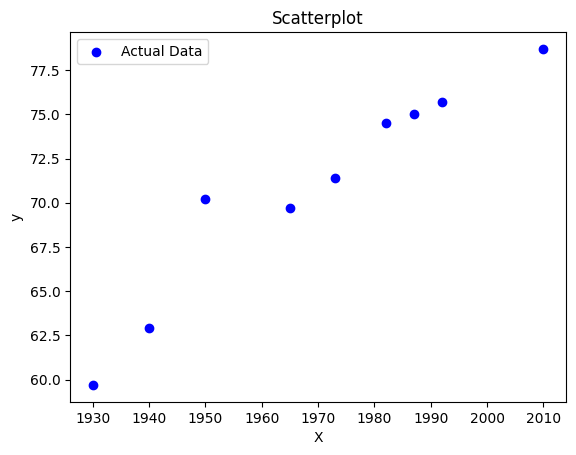

In [200]:
X3 = df3["Year"].values.reshape(-1, 1)  # Reshape to a 2D array
y3 = df3["Birth Life Expectancy"].values

# Plotting
plt.scatter(X3, y3, color='blue', label='Actual Data')  # Scatter plot of actual data

# Add labels and title
plt.xlabel('X')
plt.ylabel('y')
plt.title('Scatterplot')
plt.legend()

# Show plot
plt.show()

3.c Calculate the least squares line.
Y = a + bX , Y is the dependent variable, X is the independent variable, b is slope and a is the y-intercept.

In [201]:
# Perform linear regression (fit a line)
coefficients = np.polyfit(df3["Year"], df3["Birth Life Expectancy"], 1)  # Fit a line (polynomial degree 1)

# Extract slope and intercept from the coefficients
slope = coefficients[0]
intercept = coefficients[1]

print("Slope:", slope)
print("Intercept:", intercept)

Slope: 0.22747971788495108
Intercept: -377.2431020424774


In [202]:
# 3.d Find the correlation coefficient.

In [203]:
regr = linear_model.LinearRegression()
regr.fit(X3, y3)

coefficients = regr.coef_
print("Coefficients:", coefficients)

Coefficients: [0.22747972]


3.e Find the estimated life expectancy for an individual born in 1950 and for one born in 1982.

In [204]:
prediction = regr.predict([[1950]])
prediction2 = regr.predict([[1982]])
print("prediction1", prediction)
print("prediction2", prediction2)

prediction1 [66.34234783]
prediction2 [73.62169881]


3.f Based on the data, is there a linear relationship between the year of birth and life expectancy?
As shown below, you can tell that there is a linear relationship between year of birth & life expectancy.

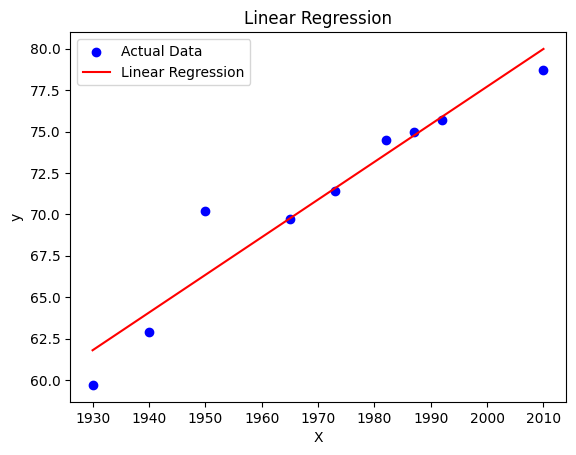

In [205]:
# Predictions
y_pred3 = regr.predict(X3)

# Plotting
plt.scatter(X3, y3, color='blue', label='Actual Data')  # Scatter plot of actual data
plt.plot(X3, y_pred3, color='red', label='Linear Regression')  # Regression line

# Add labels and title
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()

# Show plot
plt.show()

3.g Are there any outliers in the data? The outliers are 1930 & 1950

<Axes: xlabel='Year', ylabel='Birth Life Expectancy'>

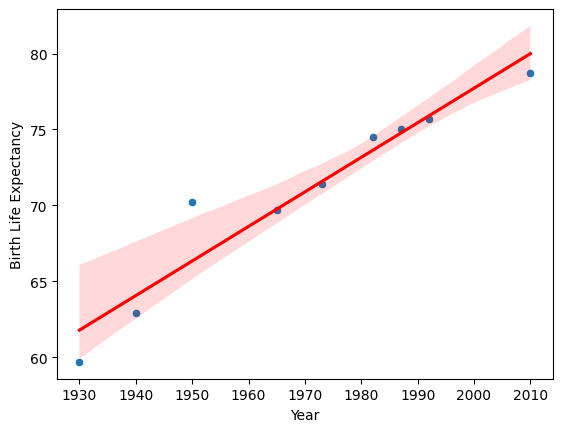

In [206]:
sns.scatterplot(x='Year', y='Birth Life Expectancy', data=df3)
sns.regplot(x='Year', y='Birth Life Expectancy', data=df3, scatter=False, color='red', label='Linear Regression Line')

Question 4

In [207]:
df4

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


4.a Train a XGBoost model with default parameters and report the result on test set

In [208]:
X = df4.drop('Channel', axis=1)
y = df4['Channel']

y[y == 2] = 0
y[y == 1] = 1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

clf=xgb.XGBClassifier()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, pred>0.5)
print("XGBoost score:", accuracy)

XGBoost score: 0.8787878787878788


4.b Train a RandomForest model with default parameters and report the result on test set

In [209]:
X = df4.drop('Channel', axis=1)
y = df4['Channel']

y[y == 2] = 0
y[y == 1] = 1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Instantiate the RandomForestClassifier
clf_rf = RandomForestClassifier()

# Train the Random Forest model
clf_rf.fit(X_train, y_train)

# Make predictions on the test set
pred_rf = clf_rf.predict(X_test)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, pred_rf)
print("Random Forest score:", accuracy_rf)

Random Forest score: 0.9015151515151515


4.c Train a XGBoost model after hyperparameter tuning and report the result on the same test set

In [210]:
X = df4.drop('Channel', axis=1)
y = df4['Channel']

y[y == 2] = 0
y[y == 1] = 1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Define the parameter grid to search
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.05],
    'n_estimators': [100, 200, 300],
    'gamma': [0, 0.1, 0.2]
}

# Instantiate XGBoost classifier
xgb_model = XGBClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

# Train XGBoost model with best parameters
xgb_model_best = XGBClassifier(**best_params)
xgb_model_best.fit(X_train, y_train)

# Make predictions on the test set
pred_xgb = xgb_model_best.predict(X_test)

# Calculate accuracy
accuracy_xgb = accuracy_score(y_test, pred_xgb)
print("XGBoost with hyperparameter tuning score:", accuracy_xgb)

XGBoost with hyperparameter tuning score: 0.8939393939393939


4.d Train a RandomForest model after hyperparameter tuning and report the result on the same test set

In [211]:
X = df4.drop('Channel', axis=1)
y = df4['Channel']

y[y == 2] = 0
y[y == 1] = 1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate RandomForest classifier
rf_model = RandomForestClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

# Train RandomForest model with best parameters
rf_model_best = RandomForestClassifier(**best_params)
rf_model_best.fit(X_train, y_train)

# Make predictions on the test set
pred_rf = rf_model_best.predict(X_test)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, pred_rf)
print("RandomForest with hyperparameter tuning score:", accuracy_rf)

RandomForest with hyperparameter tuning score: 0.8939393939393939


Question 5

Download the pca.csv dataset from Canvas where ‘class’ is the dependent variable and do the following –

In [212]:
df5

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
840,93,34.0,66.0,140.0,56.0,7,130.0,51.0,18.0,120,151.0,251.0,114.0,62.0,5.0,29.0,201.0,207,car
841,93,39.0,87.0,183.0,64.0,8,169.0,40.0,20.0,134,200.0,422.0,149.0,72.0,7.0,25.0,188.0,195,car
842,89,46.0,84.0,163.0,66.0,11,159.0,43.0,20.0,159,173.0,368.0,176.0,72.0,1.0,20.0,186.0,197,van
843,106,54.0,101.0,222.0,67.0,12,222.0,30.0,25.0,173,228.0,721.0,200.0,70.0,3.0,4.0,187.0,201,car


5.a Calculate the correlation between all the features and represent it as a heatmap.

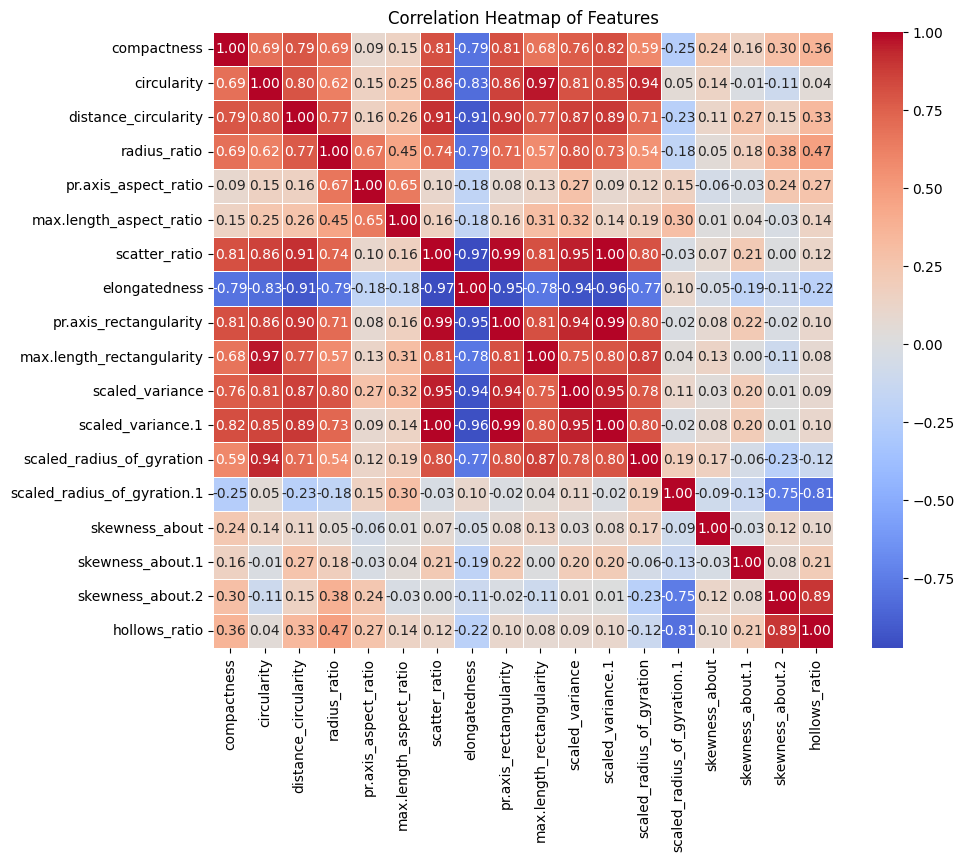

In [213]:
# Drop the column you want to exclude from the correlation matrix
df5 = df5.drop('class', axis=1)

# Calculate the correlation matrix
correlation_matrix = df5.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()

5.b Apply PCA to reduce the dimensionality of the features and predict ‘class’ on a 20% randomly selected testset.

In [217]:
# Separate features and target
X = df6.drop('class', axis=1)
y = df6['class']

# Replace blanks with N/A
for column in df6.columns:
    if df6[column].dtype == np.number:
        df6[column].fillna(df6[column].mean(), inplace=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing features
scale = StandardScaler()
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.transform(X_test)

# Applying PCA
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train the RandomForestClassifier on the transformed data
classifier = RandomForestClassifier()
classifier.fit(X_train_pca, y_train)

# Predict 'class' on the test set
y_pred = classifier.predict(X_test_pca)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'PCA accuracy: {accuracy}')

<ipython-input-217-aa094164f775>:7: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df6[column].dtype == np.number:


PCA accuracy: 0.9053254437869822


5.c Apply autoencoder to reduce the dimensionality of the features and predict ‘class’ on a 20% randomly selected testset.

In [220]:
# Separate features and target
X = df6.drop('class', axis=1)
y = df6['class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scale = StandardScaler()
Scaled_X_train = scale.fit_transform(X_train)
Scaled_X_test = scale.transform(X_test)

# Autoencoder configuration
input_dim = Scaled_X_train.shape[1]
encoding_dim = 32  # This is the size of our encoded representations

# Define the input layer
encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# Mapping input to its reconstruction
autoencoder = Model(input_layer, decoded)
encoder = Model(input_layer, encoded)

# Compile & train the autoencoder
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(X_train_scaled, X_train_scaled,
                epochs=100,
                batch_size=256,
                validation_split=0.2,
                verbose=0, shuffle=True)

# Encoder on the training and test data
Encoded_X_train = encoder.predict(X_train_scaled)
Encoded_X_test= encoder.predict(X_test_scaled)

# Train RandomForestClassifier on new data
classifier = RandomForestClassifier()
classifier.fit(Encoded_X_train, y_train)

# Predict 'class' on the test set
y_pred = classifier.predict(Encoded_X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Autoencoder accuracy: {accuracy}')

6/6 [==============================] - 0s 3ms/step
Autoencoder accuracy: 0.8165680473372781
